In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import json
import re
import os

# top1, top5 = [], []
# for b in range(2, 16):
#     path = f'/workspace/Weight_compression/hf_model_comp_results/RTN/clip/clip_L_14_W{b}g128_result.json'
#     with open(path, 'r') as f:
#         data = json.load(f)
#         top1.append(data['iamagenet'][0])
#         top5.append(data['iamagenet'][1])
        
# print(top1)
# print(top5)

# plot_data['RTN'] = {'top1': top1, 'top5': top5}
# plot_data['RTN']['bit'] = range(2, 16)



In [3]:

# path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/clip_ql_llama_clip_ft/openai--clip-vit-large-patch14'
all_result = {}
models = ['CLIP', 'SigLIP', 'DINOv2']

## Qtip
clip_paths = '/workspace/Weight_compression/hf_model_comp_results/qtip/clip-vit-large-patch14/clip-vit-large-patch14_{b}bit_result.json'
siglip_paths = '/workspace/Weight_compression/hf_model_comp_results/qtip/google/siglip-base-patch16-224/{b}bit_imagenet_result.json'
dino_paths = '/workspace/Weight_compression/hf_model_comp_results/qtip/facebook--dinov2-large-imagenet1k-1-layer/{b}bit_imagenet_result.json'

all_paths = [clip_paths, siglip_paths, dino_paths]
for model, paths in zip(models, all_paths):
    plot_data = {}
    top1, top5 = [], []
    for b in range(2, 7):
        path = paths.format(b= b)
        with open(path, 'r') as f:
            data = json.load(f)
            try:
                top1.append(data['iamagenet'][0])
                top5.append(data['iamagenet'][1])
            except:
                top1.append(data['ppl']['imagenet'][0])
                top5.append(data['ppl']['imagenet'][1])
    print(top1)
    print(top5)

    plot_data['QTIP'] = {'top1': top1, 'top5': top5}
    plot_data['QTIP']['bit'] = range(2, 7)
    
    all_result[model] = plot_data

# all_result['SigLIP'] = {}


clip_paths = [
    ('NWC_ql_rnrom_ldlq(llama-clip)', '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/openai--clip-vit-large-patch14/(llama-clip)_rnorm_ldlq128'),
    # ('NWC_ql_rnrom_ldlq(clip)', '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/openai--clip-vit-large-patch14/(clip)_rnorm_ldlq128'),
    # ('NWC_ql_rnrom_ldlq(llama)', '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/openai--clip-vit-large-patch14/(llama)_rnorm_ldlq128'),
]
siglip_paths = [
    # ('NWC_ql_rnrom_ldlq(llama)', '/workspace/Weight_compression/hf_model_comp_results/google/siglip-base-patch16-224/(llama)_rnorm_ldlq128'),
    ('NWC_ql_rnrom_ldlq(llama-siglip)', '/workspace/Weight_compression/hf_model_comp_results/google/siglip-base-patch16-224/(llama-siglib)_rnorm_ldlq128')
]
dino_paths = [
    # ('llama', '/workspace/Weight_compression/hf_model_comp_results/facebook--dinov2-large-imagenet1k-1-layer/(llama)ql_rnorm_ldlq128'),
    ('llama-dino', '/workspace/Weight_compression/hf_model_comp_results/facebook--dinov2-large-imagenet1k-1-layer/(llama-dino)ql_rnorm_ldlq128')
]
all_labels = {}
all_labels['CLIP'] = [r'QTIP$^†$', r'NWC$^†$ (Ours)']
# all_labels['CLIP'] = [r'QTIP$^⁎$', 'llama-clip', 'clip', 'llama']
all_labels['SigLIP'] = [r'QTIP$^†$', r'NWC$^†$ (Ours)']
# all_labels['SigLIP'] = [r'QTIP$^†$', r'llama', 'llama-siglip']
all_labels['DINOv2'] = [r'QTIP$^†$', r'NWC$^†$ (Ours)']
# all_labels['DINOv2'] = [r'QTIP$^†$', r'llama', 'llama-dino']

all_paths = [clip_paths, siglip_paths, dino_paths]

for model, paths in zip(models, all_paths):   
    plot_data = {} 
    for key, path in paths:
        listdir = glob.glob(f'{path}/*result.json')
        listdir = [l for l in listdir if 'imagenet' in l]
        print(listdir[:1])
        top1, top5 = [], []
        bpp_loss = []
        for file in listdir:
            # bit = re.search(r'w(\d+)', file.lower()).group(1)
            with open(file, 'r') as f:
                results = json.load(f)
                bpp_loss.append(results['bpp_loss'])
                top1.append(results['ppl']['imagenet'][0])
                top5.append(results['ppl']['imagenet'][0])
        sorted_indices = sorted(range(len(bpp_loss)), key=lambda i: bpp_loss[i])
        bpp_loss = [bpp_loss[i] for i in sorted_indices]
        top1 = [top1[i] for i in sorted_indices]
        top5 = [top5[i] for i in sorted_indices]

        # print(bpp_loss)
        # print(top1)
        # print(top5)
        plot_data[key] = {'top1': top1, 'top5': top5, 'bit': bpp_loss}
  
    all_result[model].update(plot_data)
    
base = {}
base['CLIP'] = 0.7117
base['SigLIP'] = 0.69652
base['DINOv2'] = 0.861

[0.46392, 0.66476, 0.69932, 0.7019, 0.70228]
[0.74344, 0.89356, 0.9093, 0.91188, 0.9118]
[0.48002, 0.65966, 0.68702, 0.69244, 0.69346]
[0.73258, 0.88356, 0.90168, 0.90256, 0.90194]
[83.894, 85.726, 86.008, 86.072, 86.078]
[97.028, 97.482, 97.534, 97.57, 97.566]
['/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/openai--clip-vit-large-patch14/(llama-clip)_rnorm_ldlq128/lmbda300_imagenet_result.json']
['/workspace/Weight_compression/hf_model_comp_results/google/siglip-base-patch16-224/(llama-siglib)_rnorm_ldlq128/lmbda300_imagenet_result.json']
['/workspace/Weight_compression/hf_model_comp_results/facebook--dinov2-large-imagenet1k-1-layer/(llama-dino)ql_rnorm_ldlq128/lmbda300_imagenet_result.json']


In [4]:
data

{'ppl': {'imagenet': [86.078, 97.566]}}

In [5]:
# bit =  [2.265098358234416, 2.63773999078487, 3.14076128270891, 3.93255517993193, 4.760257585261895, 5.964859002327854, 6.329915328400568]
# top1 = [0.4159, 0.5724, 0.622, 0.6418, 0.70096, 0.7099, 0.71032]
# top5 = [0.6751, 0.8336, 0.8625, 0.8754, 0.91016, 0.9141, 0.9147]
# plot_data['NWC_ql(llama8b)'] = {'top1': top1, 'top5': top5}
# plot_data['NWC_ql(llama8b)']['bit'] = bit

# bit =  [2.27731001603248, 2.6495901989096873, 3.152618712526027, 3.9349989225547812]
# top1 = [0.06828, 0.12124, 0.59872, 0.59522]
# top5 = [0.15818, 0.26686, 0.84898, 0.84534]
# plot_data['NWC_ql(clip)'] = {'top1': top1, 'top5': top5}
# plot_data['NWC_ql(clip)']['bit'] = bit

/tmp/ipykernel_449303/1138049742.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


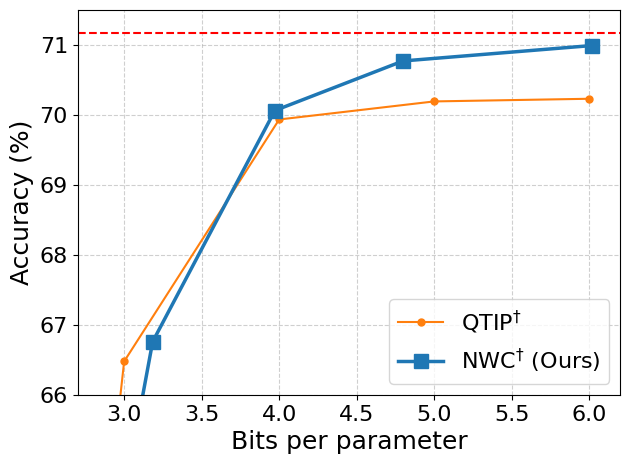

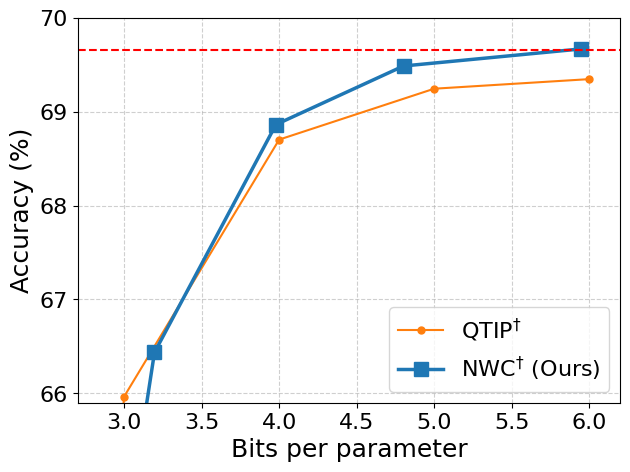

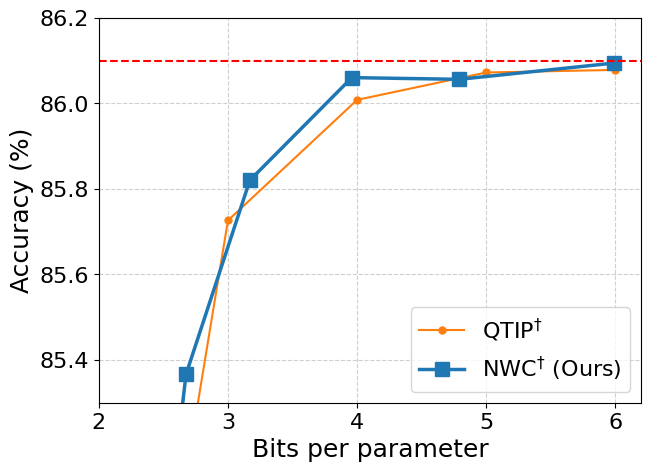

In [13]:

import matplotlib.cm as cm

plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

for model, plot_data in all_result.items():
    
    fig, ax = plt.subplots(figsize=(7, 5))
    cmap = cm.get_cmap('tab10')
    colors = {}
    idx = 1
    for name in all_labels[model]:
        if 'Ours' in name:          # 필요하면 name.lower().find('our') >= 0 로
            colors[name] = cmap(0)
        else:
            colors[name] = cmap(idx)
            idx += 1


    for (key, data), l in zip(plot_data.items(), all_labels[model]):
        if not model == 'DINOv2':
            acc = [a*100 for a in data['top1']]
        else :
            acc = data['top1']
        
        marker = 's' if 'Our' in l else 'o'
        marker_size = 10 if marker == 's' else 5
        lw = 2.5 if marker == 's' else 1.5
        linestyle = '-'    
        # axs[0].plot(x_smooth, y_smooth, linestyle=linestyle, color=color, label=label, alpha=1, lw=lw)
        
        bit = np.array(data['bit'])
        mask = bit < 6.2
        # mask = bit < 10 
        bit = bit[mask]
        acc = np.array(acc)[mask]
        ax.plot(bit, acc, label=f'{l}', marker=marker, ms= marker_size, linestyle = linestyle, lw= lw, color= colors[l])
        # ax.plot(data['bit'], data['top5'], label=f'{model} Top5', marker='o')
        
    # Labels and title
    ax.set_xlabel('Bits per parameter')
    # ax.set_xlabel('Avg. Bits')
    ax.set_ylabel('Accuracy (%)')
    ax.legend()
    # ax.set_ylim(0.695, None)
    ax.axhline(y=base[model]*100, color='r', linestyle='--', label='Top1')
    # ax.axhline(y=0.9149, color='r', linestyle='--', label='Top5')

    # ax.set_title('ImageNet-1K')
    # ax.set_title(model)
    if model == 'CLIP':
        ax.set_xlim(2.7, 6.2)
        ax.set_ylim(66, 71.5)
    elif model == 'SigLIP':
        ax.set_xlim(2.7, 6.2)
        ax.set_ylim(65.9, 70)
    else:
        ax.set_xlim(2, 6.2)
        ax.set_ylim(85.3, 86.2)
        pass
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    filename = os.path.join('plots', f'{model}.png')
    # plt.savefig(filename, dpi=300)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt

# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# # Plot 1: bit <= 4.5
# for model, model_data in plot_data.items():
#     bits = np.array(model_data['bit'])
#     top1s = np.array(model_data['top1'])
#     mask = bits <= 4.5
#     ax1.plot(bits[mask], top1s[mask], label=f'{model} Top1', marker='o')

# ax1.set_title('Bit ≤ 4.5')
# ax1.set_xlabel('Bit')
# ax1.set_ylabel('Imagenet Acc.')
# ax1.axhline(y=0.7121, color='r', linestyle='--', label='Top1')
# ax1.grid(True)
# ax1.legend()
# ax1.set_ylim(0.5, None)

# # Plot 2: bit > 4.5
# for model, model_data in plot_data.items():
#     bits = np.array(model_data['bit'])
#     top1s = np.array(model_data['top1'])
#     mask = bits > 4.5
#     ax2.plot(bits[mask], top1s[mask], label=f'{model} Top1', marker='o')

# ax2.set_title('Bit > 4.5')
# ax2.set_xlabel('Bit')
# ax2.axhline(y=0.7121, color='r', linestyle='--')
# ax2.grid(True)
# ax2.legend()
# ax2.set_ylim(None, None)

# plt.tight_layout()
# plt.show()
